<h3><b>1)Import Libraries and Load dataset</b></h3>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("../data/raw/fetal_health.csv")
df.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


<h3><b>2) Data Exploration and Data Cleaning</b></h3>

In [33]:
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.iloc[0]) - 1}")
print(f"Classes in target(fetal_health): {df["fetal_health"].unique()}")

Number of records: 2126
Number of features: 21
Classes in target(fetal_health): [2. 1. 3.]


In [34]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**Remove duplicate records**

In [35]:
#finding duplicate records
dup_boolean = df.duplicated()
print(f"Number of duplicate records: {dup_boolean.sum()}")
df.drop_duplicates(inplace = True)
print(f"Number of records after droping duplicates: {len(df)}")

Number of duplicate records: 13
Number of records after droping duplicates: 2113


**Class Distribution**

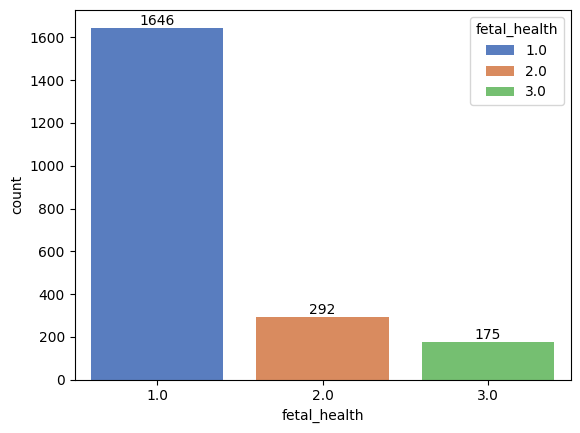

In [36]:
#Visualize class distribution
#1 -> Normal, 2 -> Suspect, 3 -> Pathological
ax = sns.countplot(data = df, x = "fetal_health", hue = "fetal_health", palette = "muted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Outlier Analysis using IQR method(except target)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["fetal_health"])
Y = df["fetal_health"]

# Outlier Detection Using IQR
def find_outliers_iqr(data):
    outlier_count = {}
    numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_count[col] = len(outliers)

    for i, (feature, count) in enumerate(outlier_count.items(), start=1):
        if count > 0:
            print(f"{i} '{feature}': {count} outliers found")
        else:
            print(f"{i} '{feature}': No outliers found")

find_outliers_iqr(X)

  

--- Outlier Analysis using IQR Method ---
1 'baseline value': No outliers found
2 'accelerations': 14 outliers found
3 'fetal_movement': 305 outliers found
4 'uterine_contractions': 1 outliers found
5 'light_decelerations': 150 outliers found
6 'severe_decelerations': 7 outliers found
7 'prolongued_decelerations': 178 outliers found
8 'abnormal_short_term_variability': No outliers found
9 'mean_value_of_short_term_variability': 70 outliers found
10 'percentage_of_time_with_abnormal_long_term_variability': 305 outliers found
11 'mean_value_of_long_term_variability': 71 outliers found
12 'histogram_width': No outliers found
13 'histogram_min': No outliers found
14 'histogram_max': 24 outliers found
15 'histogram_number_of_peaks': 19 outliers found
16 'histogram_number_of_zeroes': 502 outliers found
17 'histogram_mode': 73 outliers found
18 'histogram_mean': 45 outliers found
19 'histogram_median': 28 outliers found
20 'histogram_variance': 184 outliers found
21 'histogram_tendency': No o

<h3><b>3)Feature Scaling & splitting dataset</b></h3>

**70|15|15 train-test-validation split**

In [37]:
from sklearn.model_selection import train_test_split

#Splitting data into 70% training and 30% temporary 
x_train, x_temp, y_train, y_temp = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

#Splitting 30% temporary into 15% validation and 15% test
x_cv, x_test, y_cv, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("\nShape of x_cv (validation):", x_cv.shape)
print("Shape of y_cv (validation):", y_cv.shape)
print("\nShape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (1479, 21)
Shape of y_train: (1479,)

Shape of x_cv (validation): (317, 21)
Shape of y_cv (validation): (317,)

Shape of x_test: (317, 21)
Shape of y_test: (317,)


**Feature Scaling with Z-score normalization**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_cv = scaler.transform(x_cv)